# MOVIELENS DATASET ANALYSIS

#### The GroupLens Research Project is a research group in the Department of Computer Science and Engineering in the University of Minnesota. The researchers of this group are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. 
         
         

##### Here, The Exploratory Data Analysis , Machine Learning Agorithm is performed on the Dataset and then Visualized.

#### The following Libraries are imported which are required for the analysis of the data.

In [32]:
#Import Relevant libraries required for the Analsyis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


#### The datasets are acquired from the Grouplens website and then loaded into the notebook.

In [3]:
#Loading the datasets
movies_data= pd.read_csv('movies.dat',sep='::' , names = ['MovieID','Title','Genres'])
ratings_data = pd.read_csv('ratings.dat',sep='::',names = ['UserID','MovieID','Rating','Timestamp'])
users_data = pd.read_csv('users.dat',sep='::',names=['UserID','Gender','Age','Occupation','Zip-code'])

C:\Users\jeeva\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\jeeva\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jeeva\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='pyt

#### A quick analysis of the dataset is required for better understanding of the data.

In [4]:
#Movies Head
movies_data.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
#Ratings Head
ratings_data.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [6]:
#Users Head
users_data.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


## Exploratory Data Analysis

#### Visualizing User Age Distribution

In [7]:
users_data['Age'].value_counts()

25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: Age, dtype: int64

Text(0.5,0,'Age Distribution')

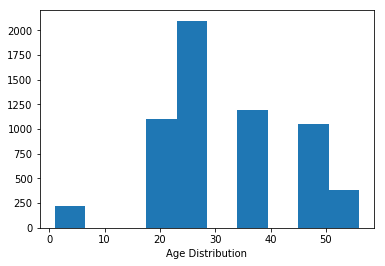

In [8]:
plt.hist(users_data['Age'])
plt.xlabel('Age Distribution')


#### Visualizing Overall Rating by Users

In [9]:
#Merge all the data for EDA
AllData = pd.merge(pd.merge(movies_data,ratings_data, on = 'MovieID'),users_data, on = 'UserID')


In [10]:
AllData.head(4)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067


In [11]:
AllData.groupby('Rating',axis = 0).UserID.count()

Rating
1     56174
2    107557
3    261197
4    348971
5    226310
Name: UserID, dtype: int64

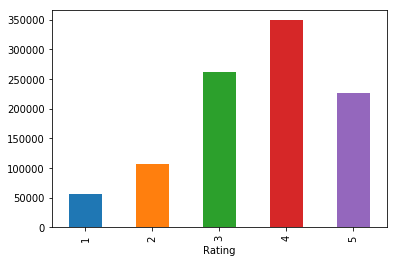

In [34]:
AllData.groupby('Rating' , axis = 0).UserID.count().plot(kind='bar')

#### Finding and visualizing the user rating of the movie “Toy Story”

In [13]:
AllData[(AllData.Title == 'Toy Story (1995)')].head(5)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
53,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
124,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
263,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
369,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35,1,95370


In [14]:
AllData[(AllData.Title == 'Toy Story (1995)')].groupby('Rating' , axis =0).UserID.count()

Rating
1     16
2     61
3    345
4    835
5    820
Name: UserID, dtype: int64

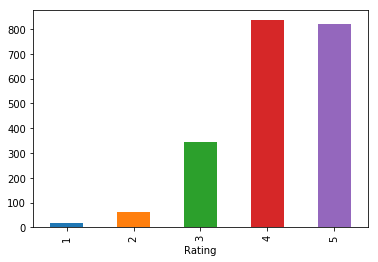

In [15]:
AllData[(AllData.Title == 'Toy Story (1995)')].groupby('Rating' , axis =0).UserID.count().plot(kind='bar')

#### Finding and visualizing the viewership of the movie “Toy Story” by age group

In [16]:
AllData[(AllData.Title == 'Toy Story (1995)')].head(5)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
53,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
124,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
263,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
369,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35,1,95370


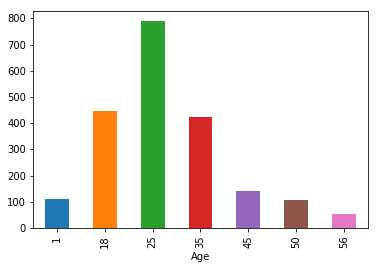

In [17]:
 AllData[(AllData.Title == 'Toy Story (1995)')].groupby('Age',axis=0).Rating.count().plot(kind='bar')

#### Finding and visualizing the top 25 movies by viewership rating

In [18]:
AllData.groupby(['MovieID'], axis = 0).Rating.count().nlargest(25)


MovieID
2858    3428
260     2991
1196    2990
1210    2883
480     2672
2028    2653
589     2649
2571    2590
1270    2583
593     2578
1580    2538
1198    2514
608     2513
2762    2459
110     2443
2396    2369
1197    2318
527     2304
1617    2288
1265    2278
1097    2269
2628    2250
2997    2241
318     2227
858     2223
Name: Rating, dtype: int64

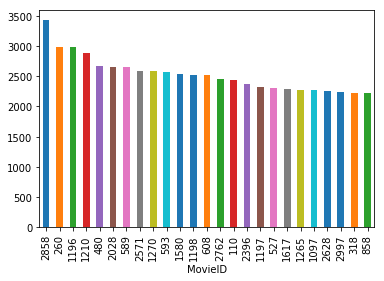

In [19]:
AllData.groupby(['MovieID'], axis = 0).Rating.count().nlargest(25).plot(kind='bar')


#### Finding the rating for a particular user of user id = 2696


In [20]:
 AllData[AllData.UserID == 2696]

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210
991040,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,973308676,M,25,7,24210
991041,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,973308865,M,25,7,24210
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,973308842,M,25,7,24210
991043,1625,"Game, The (1997)",Mystery|Thriller,2696,4,973308842,M,25,7,24210
991044,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,973308920,M,25,7,24210


#### Visualizing the rating data by user of user id = 2696


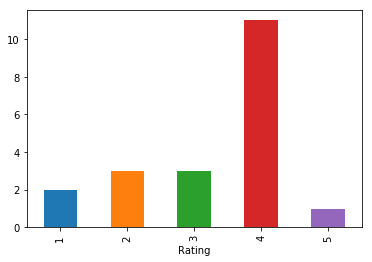

In [22]:
AllData[AllData.UserID == 2696].groupby('Rating').Rating.count().plot(kind='bar')

## Machine Learning

#### Performing Machine Learning on the first 500 extracted records

In [23]:
#Get first 500 records from all data with MovieID,Age,Occupation,Rating
dataset = AllData.iloc[:500,[0,7,8,4]]
dataset.head()

,MovieID,Age,Occupation,Rating
0,1,1,10,5
1,48,1,10,5
2,150,1,10,5
3,260,1,10,4
4,527,1,10,5


#### Using MovieID, Age, and Occupation as FEATURES and Rating as LABEL
     

In [24]:
#Create feature and label
features = dataset.iloc[:,[0,1,2]].values
label = dataset.iloc[:,-1].values

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 4 columns):
MovieID       500 non-null int64
Age           500 non-null int64
Occupation    500 non-null int64
Rating        500 non-null int64
dtypes: int64(4)
memory usage: 19.5 KB


#### Creating Train and Test datasets 

In [26]:
#Create train-test split
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,label,test_size=0.2, random_state=0)

C:\Users\jeeva\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### KNN Algorithm is used as it is a multi-class classification

In [27]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

#### The Model Scores are tested and the data is found to be generalized

In [28]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.5125
0.35


#### Plotting the Histogram for the Movie Data

(array([111540.,  88165.,  93040., 152426.,  89853., 106948., 107465.,
         96917.,  85914.,  67941.]),
 array([1.0000e+00, 3.9610e+02, 7.9120e+02, 1.1863e+03, 1.5814e+03,
        1.9765e+03, 2.3716e+03, 2.7667e+03, 3.1618e+03, 3.5569e+03,
        3.9520e+03]),
 <a list of 10 Patch objects>)

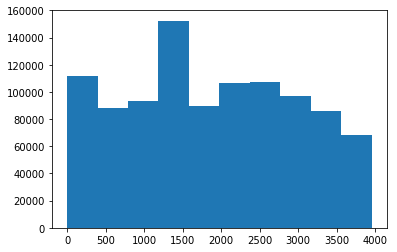

In [29]:
#Histogram for movie
plt.hist(AllData.MovieID)


#### Plotting the Histogram for the Age Data

(array([ 27211.,      0.,      0., 183536., 395556.,      0., 199003.,
             0., 156123.,  38780.]),
 array([ 1. ,  6.5, 12. , 17.5, 23. , 28.5, 34. , 39.5, 45. , 50.5, 56. ]),
 <a list of 10 Patch objects>)

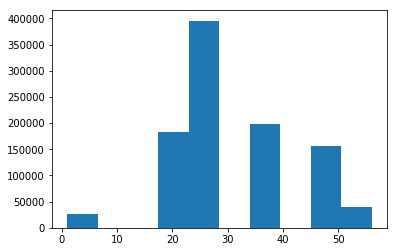

In [30]:
plt.hist(AllData.Age)

#### Plotting the Histogram for the Occupation Data 

(array([215850.,  81691., 152882., 142630.,  14051.,  43853.,  70968.,
         72060., 118837.,  87387.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <a list of 10 Patch objects>)

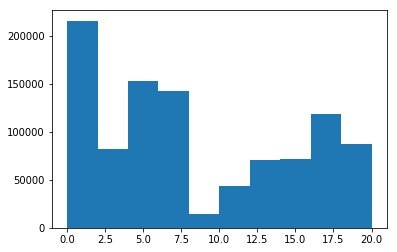

In [31]:
plt.hist(AllData.Occupation)